In [1]:
#importaciones
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
models = pd.read_csv('/home/jonathan/events.csv',low_memory = False)

In [3]:
models.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
models.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

## 10 modelos con mas vistas

In [6]:
#10 modelos mas vistos
models['model'] = models['model'].dropna()
modelos = models[(models['event'] == 'viewed product') & (models['model'])].groupby('model')['event'].count()
modelos1 = pd.DataFrame(data = modelos)

Text(0.5,6.8,'Modelos')

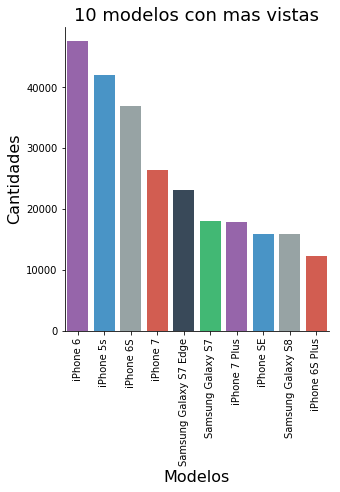

In [7]:
modelos2 = modelos1.reset_index().sort_values(by= 'event', ascending = False)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
ax = sns.catplot(x="model", y="event", kind = "bar", palette=flatui, data = modelos2.head(10))
ax.set_xticklabels(modelos2.head(10)['model'].values,rotation=90)

plt.title('10 modelos con mas vistas', fontsize = 18)
plt.ylabel('Cantidades', fontsize = 16)
plt.xlabel('Modelos', fontsize = 16)


## 10 dispositivos con mas conversiones

In [8]:
convXModelo = models[(models['event'] == 'conversion') & (models['model'])].groupby('model')['event'].count()
convXModelo1 = pd.DataFrame(data = convXModelo)

convXModelo2 = convXModelo1.reset_index().sort_values(by= 'event', ascending = False)
convXModelo2.rename(columns = {'event' : 'cantidadConversiones'},inplace = True)
convXModelo2

#111 modelos con conversiones

,model,cantidadConversiones
55,Samsung Galaxy J5,88
102,iPhone 5s,84
103,iPhone 6,71
83,Samsung Galaxy S6 Flat,39
105,iPhone 6S,37
101,iPhone 5c,33
20,Motorola Moto G4 Plus,30
15,Motorola Moto G3 4G,30
59,Samsung Galaxy J7,28
34,Samsung Galaxy A5,27


Text(0.5,6.8,'Modelos')

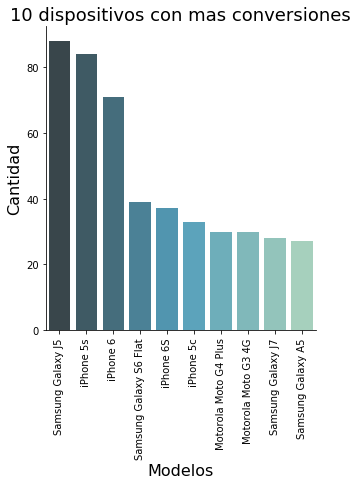

In [9]:
ax = sns.catplot(x="model", y="cantidadConversiones", palette="GnBu_d", kind ='bar', data = convXModelo2.head(10))
ax.set_xticklabels(convXModelo2.head(10)['model'].values,rotation=90)

plt.title('10 dispositivos con mas conversiones', fontsize = 18)
plt.ylabel('Cantidad', fontsize = 16)
plt.xlabel('Modelos', fontsize = 16)


* Entre los dispositivos con mas conversiones lidera el Galaxy J5, esto se puede deber a su precio en comparacion de otros modelos de la marca

## Distribucion cuantitativa de los dispositivos con mayoria de checkouts

Text(0.5,6.8,'Cantidad (log)')

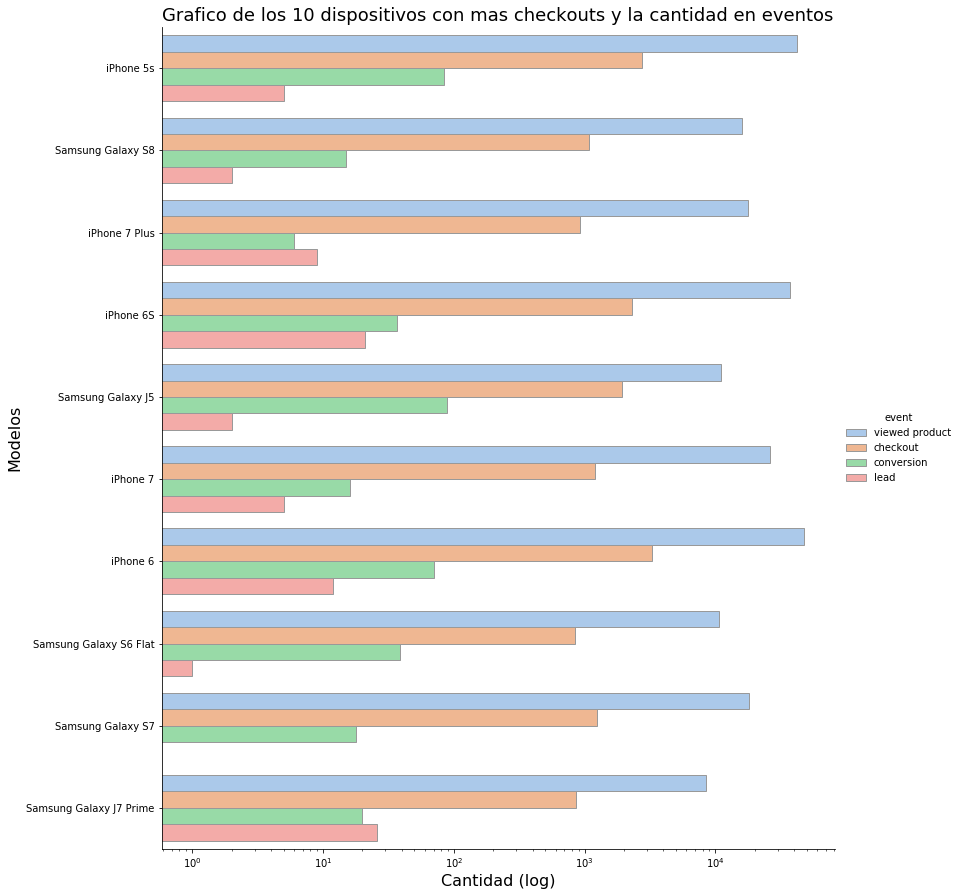

In [10]:
#10 dispositivos con mas checkouts
dmc = models[(models['event'] == 'checkout') & (models['model'])].groupby('model')['event'].count()
dmc = pd.DataFrame(data = dmc.sort_values(ascending =False).head(10)).reset_index()
#creo el dataframe de los 10 dispositivos con mas checkouts
checksPorModel = models[(models['model'].isin(np.array(dmc['model'])))]
#Grafico de los 10 dispositivos con mas checkouts y la cantidad en eventos
ax = sns.catplot(y="model", hue="event", kind="count", palette="pastel", edgecolor=".6",\
                data=checksPorModel, height = 12,aspect = 1, ci = 95);
#Cambio la proporcion (viewed products es muy alto ~ 400000) 
plt.xscale('log')
#Seteo labels
plt.title('Grafico de los 10 dispositivos con mas checkouts y la cantidad en eventos', fontsize = 18)
plt.ylabel('Modelos', fontsize = 16)
plt.xlabel('Cantidad (log)', fontsize = 16)

* Se puede observar que hay pocos leads en relacion a la cantidad de vistos, 
*  Como modelos 'outlier' el iphone 7 Plus tiene menos conversiones que la cantidad de leads al igual que el Galaxy J7 Prime

## Cuales son los modelos que causaron mayor cantidad de leads?

Text(0.5,6.8,'Cantidad (log)')

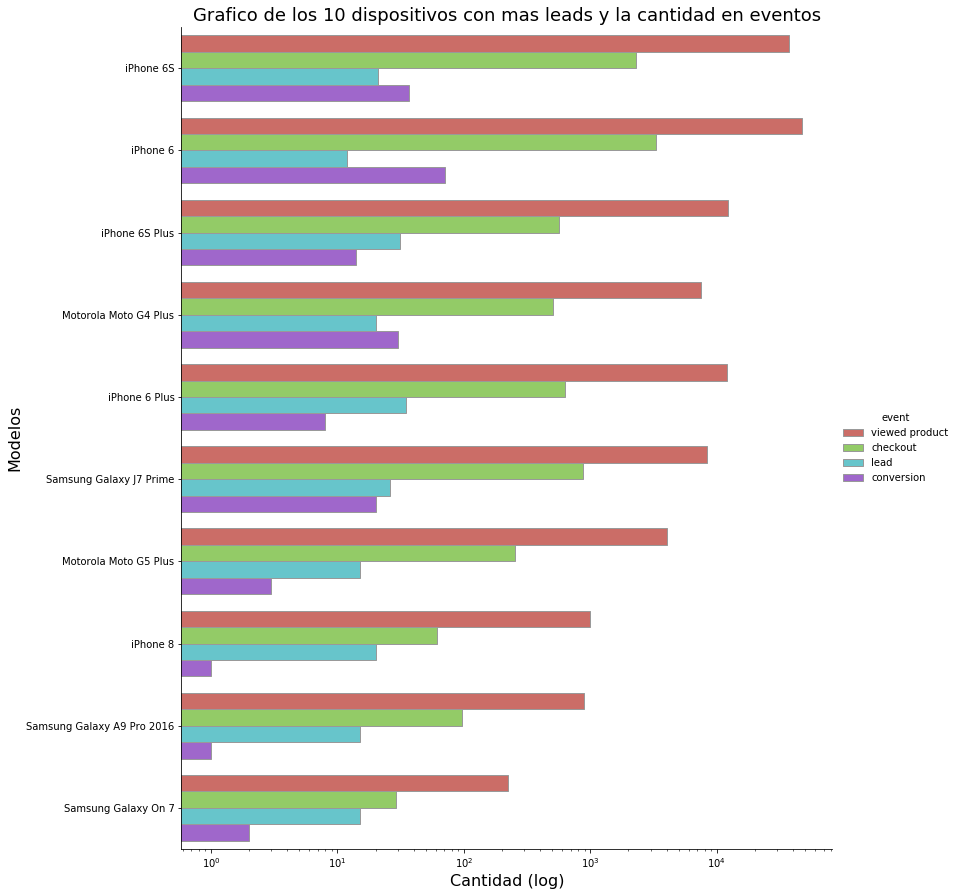

In [11]:
#10 dispositivos con mas leads
dml = models[(models['event'] == 'lead') & (models['model'])].groupby('model')['event'].count()
dml = pd.DataFrame(data = dml.sort_values(ascending =False).head(10)).reset_index()
#creo el dataframe de los 10 dispositivos con mas leads
leadsForModel = models[(models['model'].isin(np.array(dml['model'])))]
#Grafico de los 10 dispositivos con mas leads y la cantidad en eventos
ax = sns.catplot(y="model", hue="event", kind="count", palette="hls", edgecolor=".6",\
                data=leadsForModel, height = 12,aspect = 1, ci = 95);
#Cambio la proporcion (viewed products es muy alto) 
plt.xscale('log')
#Seteo labels
plt.title('Grafico de los 10 dispositivos con mas leads y la cantidad en eventos', fontsize = 18)
plt.ylabel('Modelos', fontsize = 16)
plt.xlabel('Cantidad (log)', fontsize = 16)

* Se detectan varios funnels de usuarios que entran al checkout evitando las conversiones, una parte se convierte en lead pero no realiza conversion, esto se podria deber a una falta de stock, el caso mas notable es el del iphone 8 y el A9 Pro 2016, en cambio dispositivos que aportan al sitio por ejemplo el iphone 6 y el Moto G4 Plus

## Modelos en mejores condiciones


In [12]:
#Cantidad de modelos por condicion sin nulos
models['condition'].dropna().value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [13]:
modelosEnMejoresCond = models[(models['condition'] == 'Excelente') & (models['model'])]

In [14]:
modelosEnMejoresCond = pd.crosstab(modelosEnMejoresCond.condition,modelosEnMejoresCond.model).max().sort_values(ascending = False)
modelosEnMejoresCond

model
iPhone 6                                     12598
iPhone 6S                                    12363
iPhone 5s                                     9774
iPhone 7                                      8151
iPhone 7 Plus                                 7667
Samsung Galaxy S7 Edge                        6872
iPhone SE                                     5507
Samsung Galaxy S8                             5187
Samsung Galaxy S7                             5069
iPhone 6S Plus                                3890
Samsung Galaxy S8 Plus                        3695
iPhone 6 Plus                                 3466
Samsung Galaxy J7 Prime                       3445
Motorola Moto G4 Plus                         2733
Samsung Galaxy S6 Flat                        2433
iPhone 5c                                     2382
Samsung Galaxy S6 Edge                        2365
Samsung Galaxy J5                             2083
iPhone 5                                      2019
Samsung Galaxy A5 2017   

In [15]:
## 10 modelos en 'peores' condiciones (Bom)
models['condition'].value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [16]:
modelosEnPeoresCond = models[(models['condition'] == 'Bom - Sem Touch ID') & (models['model'])]

In [17]:
modelosEnPeoresCond = pd.crosstab(modelosEnPeoresCond.condition,modelosEnPeoresCond.model).max().sort_values(ascending = False)
modelosEnPeoresCond

model
iPhone 5s                9597
iPhone 6                 4434
iPhone SE                 593
iPhone 6S                 452
iPhone 5                  139
iPhone 6 Plus              30
Samsung Galaxy Note 5      27
iPhone 6S Plus             23
dtype: int64

## Cuales son los modelos en condicion de nuevo disponibles en la web?

In [18]:
modelosMasNuevos = models[(models['condition'] == 'Novo') & (models['model'])]

In [19]:
modelosMasNuevos = pd.crosstab(modelosMasNuevos.condition,modelosMasNuevos.model).max().sort_values(ascending = False)
modelosMasNuevos


model
Samsung Galaxy Note 8     879
Samsung Galaxy A7 2017    312
dtype: int64

* Se puede ver que solo estan disponibles dos modelos nuevos en la pagina y el de mayor cantidad el Samsung Note 8

## 10  modelos que llegaron al checkout y mayor cantidad por condicion


Text(0.5,42,'Models')

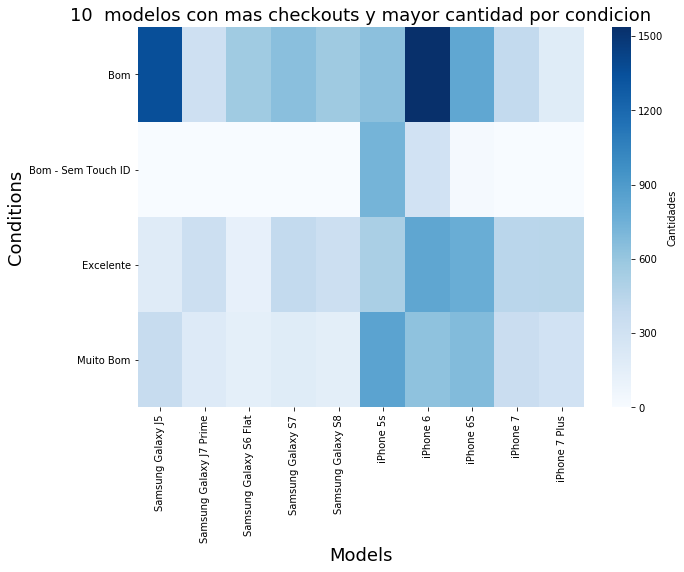

In [20]:
ConditionsAndCheckoutsModels = models[(models['event'] =='checkout')]
arrayLabels = dmc['model'].values
ConditionsAndCheckoutsModels = ConditionsAndCheckoutsModels[(ConditionsAndCheckoutsModels['model'].isin(arrayLabels))]
ConditionsAndCheckoutsModels = pd.crosstab(ConditionsAndCheckoutsModels.condition, \
                                   ConditionsAndCheckoutsModels.model)
#plot
fig,ax = plt.subplots(figsize=(10,7))
g = sns.heatmap(ConditionsAndCheckoutsModels,  cmap="Blues", ax=ax,cbar_kws={'label': 'Cantidades'})

plt.title('10  modelos con mas checkouts y mayor cantidad por condicion', fontsize = 18)
plt.ylabel('Conditions', fontsize = 18)
plt.xlabel('Models', fontsize = 18)

* Se puede ver que el telefono mas buscado es en general el iphone 5s ademas de encontrarse en condiciones 'Bom'
  Lo que puede pensarse es que todo iphone 6 llegado a Trocafone llega con un uso considerable del mismo, 
  idem el Galaxy J5 que ademas es el mas vendido

## Cual es la condicion de los modelos de mayor conversion?

Text(0.5,42,'Models')

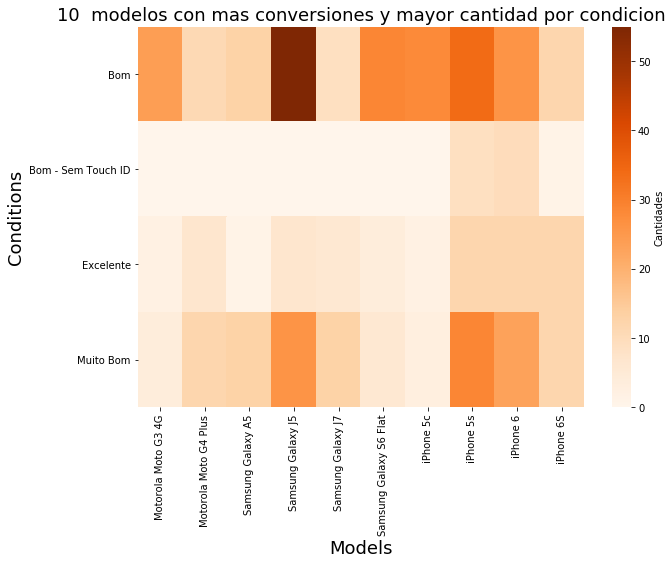

In [21]:

ConditionsAndConversionsModels = models[(models['event'] =='conversion')]
arrayLabels = convXModelo2.head(10)['model'].values
ConditionsAndConversionsModels = ConditionsAndConversionsModels[(ConditionsAndConversionsModels['model'].isin(arrayLabels))]
ConditionsAndConversionsModels = pd.crosstab(ConditionsAndConversionsModels.condition, \
                                   ConditionsAndConversionsModels.model)
#plot
fig,ax = plt.subplots(figsize=(10,7))
g = sns.heatmap(ConditionsAndConversionsModels,  cmap="Oranges", ax=ax,cbar_kws={'label': 'Cantidades'})

plt.title('10  modelos con mas conversiones y mayor cantidad por condicion', fontsize = 18)
plt.ylabel('Conditions', fontsize = 18)
plt.xlabel('Models', fontsize = 18)

* Se puede ver que el telefono mas vendido es el Samsung Galaxy J5 como habiamos concluido y que estos en general no se encuentran en condicion 'Excelente' sino en 'Bom' y 'Muito Bom'

## Colores de modelos mas comprados en  el mes de mas venta?

In [3]:
#Pasamos a datetime la columna timestamp
models['timestamp'] = pd.to_datetime(models['timestamp'], errors='raise')

#Creamos una columna de meses
models['months'] = models['timestamp'].dt.month

#Filtramos por conversiones
mesesVenta = models[(models['event'] == 'conversion')] 

#Miramos los meses de mayor venta y como se puede ver lidera el mes 5.
mesesVenta['months'].value_counts()

5    351
4    316
3    265
6    103
2     74
1     63
Name: months, dtype: int64

In [4]:
#Obtengo los mas vendidos en Mayo
masVendidosMayo = mesesVenta[(mesesVenta['months'] == 5)]
masVendidosMayo = masVendidosMayo.groupby('model')['event'].count().sort_values(ascending = False)


In [5]:
#Me quedo con los 6 primeros
masVendidosMayo = np.array(masVendidosMayo.head(6).index)

In [6]:
#Como se aprecia el dorado es el mas comprado
MVC = mesesVenta[mesesVenta['model'].isin(masVendidosMayo)].groupby('color')['model'].count().sort_values(ascending = False)
MVC

color
Dourado           138
Cinza espacial     73
Prateado           45
Preto              37
Branco             26
Ouro Rosa          20
Name: model, dtype: int64

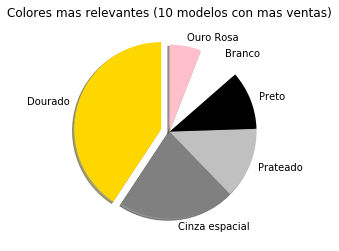

In [8]:
#Pequenio grafico
colores =MVC.index
cantidades = MVC.values
explode = (0.1, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()

ax1.pie(cantidades, explode=explode, labels=colores,
        shadow=True, startangle=90, colors=['gold','gray','silver','k','w','pink'], pctdistance= 0.7)

ax1.set(aspect="equal", title='Colores mas relevantes (10 modelos con mas ventas)')

plt.show()
